# PRE-PROCESSING :

In [6]:
# imports

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree 
from sklearn.preprocessing import MinMaxScaler
import numpy as np

from scipy.stats import zscore


In [7]:
data = pd.read_csv('../IT326/diabetes_012_health_indicators_502Rows.csv')
df = pd.DataFrame(data)

## Cleaning : Outlier

We detect outliers to find data points that are unusually far from the majority of the data, which could affect our analysis or predictions.
Then we remove rows with outliers to ensure that they don't distort the analysis or affect the performance of our models, as outliers can skew statistical measures and predictions.

In [8]:
# Define the columns to detect outliers using z-scores

columns_to_detect_outliers = ['BMI', 'Age', 'GenHlth','Education']

# Calculate z-scores for the selected columns
z_scores = df[columns_to_detect_outliers].apply(zscore)

# Define a threshold value
threshold = 2

# Identify outliers
outliers = df[(abs(z_scores) > threshold).any(axis=1)]

print("Outliers based on z-scores for the selected columns: \n")
display(outliers)

Outliers based on z-scores for the selected columns: 



,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education
10,0,0,0,1,28,0,0,0,1,1,0,1,0,1,0,0,2,5
13,0,1,1,1,45,0,0,0,0,1,1,1,0,3,0,1,5,6
17,0,0,0,1,27,0,0,0,0,0,1,1,0,1,0,0,3,6
18,0,0,0,0,23,0,0,0,0,0,1,1,0,2,0,0,2,6
21,0,1,1,1,38,1,0,0,0,1,1,1,0,5,1,0,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2,1,0,1,23,1,0,0,1,1,1,1,0,1,0,0,6,4
481,2,1,1,1,24,1,1,1,1,1,1,1,0,4,0,0,12,2
490,2,1,1,1,47,1,0,0,0,1,0,1,0,3,1,0,11,6
495,2,1,0,1,33,0,0,0,1,0,1,1,0,4,1,0,11,2


In [9]:
#Remove the rows with outliers
df_no_outlier= df.drop(outliers.index)

#count the removed rows
df_no_outlierRows=df_no_outlier.shape[0]

print("After removing outliers from the selected columns \n ")

display(df_no_outlier)

print("\nnumber of rows after remove outliers: \n"+ str(df_no_outlierRows) +"\n")

After removing outliers from the selected columns 
 


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education
0,0,1,1,1,40,1,0,0,0,0,1,1,0,5,1,0,9,4
1,0,0,0,0,25,1,0,0,1,0,0,0,1,3,0,0,7,6
2,0,1,1,1,28,0,0,0,0,1,0,1,1,5,1,0,9,4
3,0,1,0,1,27,0,0,0,1,1,1,1,0,2,0,0,11,3
4,0,1,1,1,24,0,0,0,1,1,1,1,0,2,0,0,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2,0,1,1,34,1,0,0,1,0,0,1,0,3,0,1,10,3
497,2,1,0,1,40,0,0,0,0,0,0,1,0,4,0,0,8,4
498,2,1,1,1,23,0,0,1,1,1,1,1,1,3,0,0,7,4
499,2,1,0,1,34,0,0,0,0,1,0,1,0,3,1,0,10,5



number of rows after remove outliers: 
375



## Data Transformation: Normalization

We normalize columns to bring their values to a similar scale, making comparisons and analyses fairer and more accurate, especially for machine learning models that are sensitive to the scale of features.

In [10]:

#Extract columns to normalize

columns_to_normalize =['BMI']
data_to_normalize=df_no_outlier[columns_to_normalize]

# Min-Max scaling for selected columns
normalized_data_minmax = MinMaxScaler().fit_transform(data_to_normalize)

# Replace the normalized values in the original DataFrame
df_no_outlier[columns_to_normalize] = normalized_data_minmax
print ("BMI column after normalize:  \n ")
display (df_no_outlier[columns_to_normalize].head())


BMI column after normalize:  
 


,BMI
0,0.956522
1,0.304348
2,0.434783
3,0.391304
4,0.260870


## Data Transformation: Discretization

To categorize the 'BMI' values into a smaller number of bins for easier interpretation and analysis, facilitating pattern recognition and comparison between different BMI ranges.

In [11]:

columns_to_Discretize='BMI'

binsN=6

df_no_outlier['Discretized_'+ columns_to_Discretize]= pd.cut(df_no_outlier[columns_to_Discretize], bins=binsN, labels=False)
disCol='Discretized_'+ columns_to_Discretize

# Drop the original column 'BMI' and rename the discretized column

df_no_outlier.drop(columns_to_Discretize, axis=1, inplace=True)
df_no_outlier.rename(columns={columns_to_Discretize : disCol }, inplace=True)

# Save the updated DataFrame to a new CSV file
print("Original Data:\n")
display(df[['BMI']].head())

print ("\nDiscretized Data:\n")
display(df_no_outlier[[disCol]].head())

Original Data:



,BMI
0,40
1,25
2,28
3,27
4,24



Discretized Data:



,Discretized_BMI
0,5
1,1
2,2
3,2
4,1


## Integration: Correlation 

 Remove the highly correlated attributes to prevent multicollinearity issues and enhance the efficiency of predictive models by reducing redundancy in the dataset.


In [12]:

# Calculate the correlation matrix
correlation_matrix = df_no_outlier.corr()

# Adjust the correlation threshold based on the characteristics of the new dataset
correlation_threshold = 0.70

# Find highly correlated pairs and remove one of the attributes
highly_correlated_pairs = np.where(np.abs(correlation_matrix) >= correlation_threshold)

attributes_to_remove = set()

for i, j in zip(*highly_correlated_pairs):
    if i != j and i not in attributes_to_remove and j not in attributes_to_remove:
        # Check if both attributes are not in the removal set
        attribute_i = dfr.columns[i]
        attribute_j = df.columns[j]
        attributes_to_remove.add(attribute_j)

# Remove the highly correlated attributes
dfCorr = df_no_outlier.drop(columns=attributes_to_remove)



if not df_no_outlier.equals(dfCorr):
    print("Original DataFrame:")
    display(df_no_outlier)
    print("\nDataFrame after removing highly correlated attributes:")
    display(dfCorr)
else:
     print ("\nno highly correlated attributes \n")


no highly correlated attributes 



## Feature Selection

To identify the most relevant features that have the highest correlation with the target variable, aiding in model performance improvement.

In [13]:
 from sklearn.feature_selection import SelectKBest,f_classif

# Feature selection Method: Correlation-based Feature Selection


y = df_no_outlier.iloc[:, 0]  # Select the first column as the target variable
X = df_no_outlier.iloc[:, 1:] # Select all columns except the first one as features

# Use SelectKBest with f_classif as the scoring function
selector = SelectKBest(score_func=f_classif, k=6)  # Select top 2 features
X_new = selector.fit_transform(X, y)

# Display the selected features
selected_features = X.columns[selector.get_support()]

print("the features with the highest correlation with the target variable: \nSelected Features:", selected_features)


the features with the highest correlation with the target variable: 
Selected Features: Index(['HighBP', 'Smoker', 'AnyHealthcare', 'GenHlth', 'DiffWalk',
       'Discretized_BMI'],
      dtype='object')


In [14]:
#create new csv file with preprocessing
df_no_outlier.to_csv('processed_Data.csv',index=False)

In [16]:
data = pd.read_csv('../IT326/processed_Data.csv')
df = pd.DataFrame(data)
display(df)

,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Discretized_BMI
0,0,1,1,1,1,0,0,0,0,1,1,0,5,1,0,9,4,5
1,0,0,0,0,1,0,0,1,0,0,0,1,3,0,0,7,6,1
2,0,1,1,1,0,0,0,0,1,0,1,1,5,1,0,9,4,2
3,0,1,0,1,0,0,0,1,1,1,1,0,2,0,0,11,3,2
4,0,1,1,1,0,0,0,1,1,1,1,0,2,0,0,11,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2,0,1,1,1,0,0,1,0,0,1,0,3,0,1,10,3,4
371,2,1,0,1,0,0,0,0,0,0,1,0,4,0,0,8,4,5
372,2,1,1,1,0,0,1,1,1,1,1,1,3,0,0,7,4,1
373,2,1,0,1,0,0,0,0,1,0,1,0,3,1,0,10,5,4


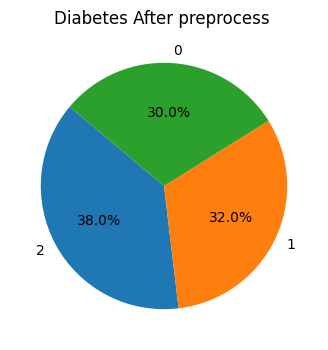

<Figure size 640x480 with 0 Axes>

In [19]:
#creat piechart 
df_sample = df.sample(n=50 , random_state =1)
Diabetes_012_freq = df_sample['Diabetes_012'].value_counts(normalize=True)*100
Diabetes_012_freq.plot.pie( autopct='%1.1f%%', figsize=(4, 4),startangle=140)
plt.title('Diabetes After preprocess ')
plt.ylabel('')
plt.show()
plt.savefig('Diabetes_After_preprocess.png')

In [20]:

num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 375
Number of columns: 18


After analyzing the original dataset, we identified and removed outliers from four columns: BMI, Age, General Health, and Education, and subsequently removed the rows containing outliers. Next, we normalized the BMI values and discretized them.